### Hopfield Networks
#### 課題Ⅰ
##### Ⅰ- 1
1. 2つのパターンを与え、重み行列wを作成
2. エネルギー関数を用いて想起させる(平衡状態)
3. 0.1程度のノイズを加えたテストデータを与え、正しく記憶できているか確認

##### Ⅰ- 2
1. 記憶させるパターン数を増やしていく
2. どの程度までパターン数を増やせるか調査

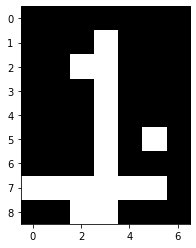

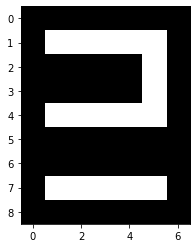

In [65]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)


""" 重み行列Wを計算 """
def fit(dim, data):
    w = np.zeros([dim, dim])
    # for _ in range(10):
    for i in data:
        w += np.outer(i, i.T)

    for i in range(dim):
        w[i][i] = 0     # 対角成分を0にする
    return w

""" 学習データにノイズを与え、テストデータを作成 """
def noise(data, rate):
    test_data = np.copy(data)
    inv = np.random.binomial(n=1, p=rate, size=len(data))
    for i, v in enumerate(data):
        if inv[i]:
            test_data[i] = -1 * v
    return test_data

''' エネルギー関数E(x)を定義し、収束するまで繰り返す '''
def energy(data, w):
    return -0.5 * np.dot(w, np.dot(data, data.T))
    # return e

""" エネルギーが変化しなくなるまで更新を行う """
# def predict(test_data, w, loop=100):
#     e = energy(test_data, w)
#     # test_data = np.dot(w, test_data)
#     # test_data = np.sign(test_data)
#     # e_new = energy(test_data, w)
#     # if np.array_equal(e, e_new):
#     #     print("a")

#     # print(e.shape, e_new.shape)
#     for i in range(loop):
#         test_data = np.dot(w, test_data)
#         # xr の符号をとる
#         test_data = np.sign(test_data)
#         e_new = energy(test_data, w)
#         if np.array_equal(e, e_new):
#             print(i)
#             return test_data
#         e = e_new
#     return test_data    

def predict(test_data, w):
    e_old = float("inf")
    for _ in range(300):  # self.loop_updateは更新の上限値
        # テストデータの更新とエネルギーの計算
        test_data = np.sign(np.dot(w, test_data))
        e_new = energy(test_data, w)

        # エネルギーが変化しなくなったら打ち切り
        if np.array_equal(e_old, e_new):
            break

        e_old = e_new

    return test_data
        
           
            
        
    


def main():
    two = np.array([
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],  
                [0,+1, 0, 0, 0, 0, 0],
                [0,+1, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]])

    nine=np.array([ 
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]
                ])
    one = np.array([ 
                [0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0,+1,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]])

    two = [2 * i - 1 for i in two]
    nine = [2 * i - 1 for i in nine]
    one = [2 * i - 1 for i in one]
    data = np.stack([one, two, nine])

    # ニューロン数
    n = 63
    # 記憶させたいパターン数
    k = 2
    # 学習データにどの程度ノイズを加えるか
    noise_rate = 0.1
    w = fit(n, data)

    
    flatten_two = data[0].flatten()
    test = noise(flatten_two, noise_rate)

    flatten_test = test.reshape(9, 7)
    plt.imshow(flatten_test)
    plt.gray()
    plt.show()

    # for i, v in enumerate(test):
    #     if i % 7 == 0 and i != 0:
    #         print('\n')
    #     print(f"{v:3d}", end="")
    # print("\n")
    
    predicted = predict(test, w)
    predicted = np.array(predicted, dtype='int')
    
    # for i, v in enumerate(predicted):
    #     if i % 7 == 0 and i != 0:
    #         print('\n')
    #     print(f"{v:3d}", end="")
    # print("\n")
    flatten_predicted = predicted.reshape(9, 7)
    plt.imshow(flatten_predicted)
    plt.gray()
    plt.show()

if __name__ == '__main__':
    main()

テストデータ
想起


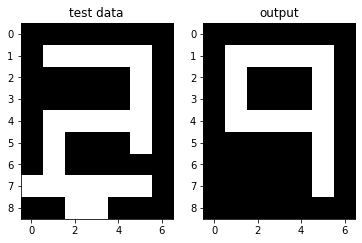

In [20]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)


""" 重み行列Wを計算 """
def fit(dim, data):
    w = np.zeros([dim, dim])
    # for _ in range(10):
    for i in data:
        w += np.outer(i, i.T)

    for i in range(dim):
        w[i][i] = 0     # 対角成分を0にする
    return w

""" 学習データにノイズを与え、テストデータを作成 """
def noise(data, rate):
    test_data = np.copy(data)
    inv = np.random.binomial(n=1, p=rate, size=len(data))
    for i, v in enumerate(data):
        if inv[i]:
            test_data[i] = -1 * v
    return test_data

''' エネルギー関数E(x)を定義し、収束するまで繰り返す '''
def energy(data, w):
    return -0.5 * np.dot(w, np.dot(data, data.T))
    

""" エネルギーが変化しなくなるまで更新を行う """
def predict(test_data, w):
    e_old = float("inf")
    for _ in range(300):  # self.loop_updateは更新の上限値
        # テストデータの更新とエネルギーの計算
        test_data = np.sign(np.dot(w, test_data))
        e_new = energy(test_data, w)

        # エネルギーが変化しなくなったら打ち切り
        if np.array_equal(e_old, e_new):
            break

        e_old = e_new

    return test_data



def main():
    arr = np.load('numbers.npy', allow_pickle=True)

    two = [2 * i - 1 for i in arr[2]]
    nine = [2 * i - 1 for i in arr[9]]
    # one = [2 * i - 1 for i in one]
    data = np.stack([two, nine])

    # ニューロン数
    n = 63
    # 記憶させたいパターン数
    k = 2
    # 学習データにどの程度ノイズを加えるか
    noise_rate = 0.1
    w = fit(n, data)

    
    flatten_two = data[0].flatten()
    test = noise(flatten_two, noise_rate)

    flatten_test = test.reshape(9, 7)
    print("テストデータ")
    # plt.imshow(flatten_test)
    # plt.gray()
    # plt.show()
    
    predicted = predict(test, w)
    predicted = np.array(predicted, dtype='int')
    
    flatten_predicted = predicted.reshape(9, 7)
    print("想起")
    # plt.imshow(flatten_predicted)
    # plt.gray()
    # plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(flatten_test)
    plt.title('test data')
    plt.subplot(1, 2, 2)
    plt.imshow(flatten_predicted)
    plt.title('output')

if __name__ == '__main__':
    main()

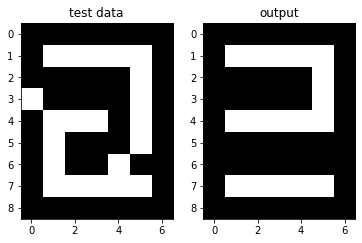

In [88]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
 
""" 重み行列wを求める """
def fit(dim, data):
    w = np.zeros([dim, dim])
    for i in data:
        w += np.outer(i, i.T)

    for i in range(dim):
        w[i][i] = 0     # 対角成分を0にする
    return w

""" データにノイズを加え、テストデータとする"""
def noise(data, rate):
    test_data = np.copy(data)
    inv = np.random.binomial(n=1, p=rate, size=len(data))
    for i, v in enumerate(data):
        if inv[i]:
            test_data[i] = -1 * v
    return test_data

''' エネルギー関数E(x)の定義 '''
def energy(data, w):
    return -0.5 * np.dot(w, np.dot(data, data.T))

""" 収束するまで繰り返す """
def recollect(test_data, w):
    e_old = float("inf")
    for _ in range(300):
        # テストデータの更新とエネルギーの計算
        test_data = np.sign(np.dot(w, test_data))
        e_new = energy(test_data, w)

        # エネルギーが変化しなくなったら打ち切り
        if np.array_equal(e_old, e_new):
            break

        e_old = e_new

    return test_data

def main():
    arr = np.load('numbers2.npy')
    data = arr
    zero = data[0]
    one = data[1]
    two = data[2]
    three = data[3]
    four = data[4]
    five = data[5]
    six = data[6]
    seven = data[7]
    eight = data[8]
    nine = data[9]
    data = [two, nine, one]

    """ 1を1に、0を―1に変換する """
    data = [d * 2 - 1 for d in data]
    
    w = fit(len(data[0]), data)

    """ データに約10%程度のノイズを加え、それをテストデータとする """
    test = noise(data[0], 0.1)
    
    predicted = recollect(test, w)
    flatten_test = test.reshape(9, 7)
    flatten_predicted = predicted.reshape(9, 7)
    plt.subplot(1, 2, 1)
    plt.imshow(flatten_test)
    plt.title('test data')
    plt.subplot(1, 2, 2)
    plt.imshow(flatten_predicted)
    plt.title('output')

if __name__ == '__main__':
    main()